# Pymaceuticals Inc.
---

### Analysis

Based on the summary statistics, it appears that Capomulin and Ramicane are the most effective drug regimens in reducing tumor volume, as they have the lowest mean and median tumor volumes and the smallest tumor volume variance and standard deviation. In contrast, Ketapril, Naftisol, and Stelasyn have the highest mean and median tumor volumes and the largest tumor volume variance and standard deviation.

It's worth noting that Capomulin and Ramicane both have potential outliers, while Infubinol and Ceftamin do not. However, it's unclear whether these potential outliers are significant enough to impact the overall effectiveness of the drug regimens.

The strong positive correlation of 0.84 between mouse weight and average tumor volume suggests that there is a relationship between these two variables, indicating that larger mice tend to have larger tumors. Additionally, the linear regression model shows that for every one-gram increase in mouse weight, the average tumor volume increases by approximately 0.95 cubic millimeters. This information could be useful in predicting the expected tumor volume based on the weight of the mouse.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview


In [2]:
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
# Display the number of unique mice IDs
num_unique_mice = len(merged_df['Mouse ID'].unique())
print(f"Number of unique mice IDs: {num_unique_mice}")

Number of unique mice IDs: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(f"Mouse ID(s) with duplicate timepoints: {duplicate_mouse}")

Mouse ID(s) with duplicate timepoints: ['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merged_df.loc[merged_df['Mouse ID'] == duplicate_mouse[0]]
print(duplicate_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = len(cleaned_df['Mouse ID'].unique())
print(f"Number of unique mice IDs after cleaning: {num_unique_mice}")

Number of unique mice IDs after cleaning: 249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdev = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean Tumor Volume': mean,
                           'Median Tumor Volume': median,
                           'Tumor Volume Variance': variance,
                           'Tumor Volume Std. Dev.': stdev,
                           'Tumor Volume Std. Err.': sem})

summary_df.head()


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
alt_summary = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
alt_summary.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
alt_summary.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

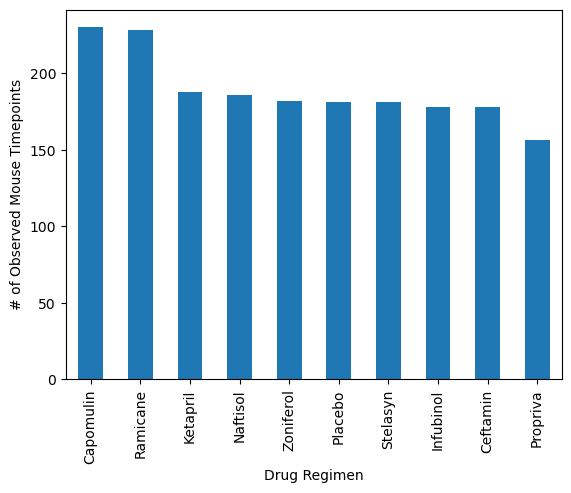

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regiment_counts=cleaned_df['Drug Regimen'].value_counts()
regiment_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

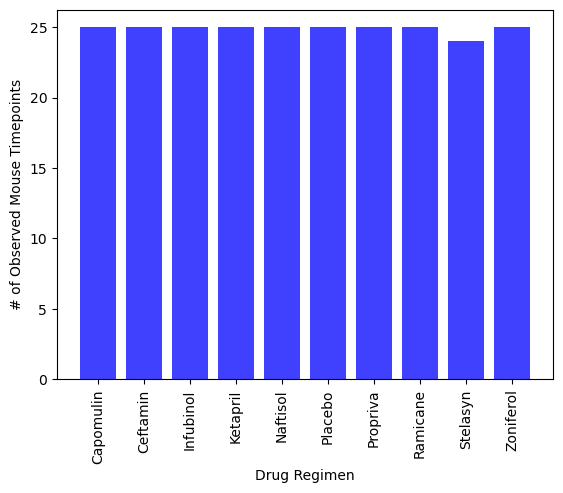

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = pd.DataFrame(cleaned_df.groupby('Drug Regimen')['Mouse ID'].nunique())
x_axis = drug_count.index
plt.bar(x_axis, drug_count['Mouse ID'], color='b', alpha=0.75,)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'Distribution of Mice by Gender'}, ylabel='Sex'>

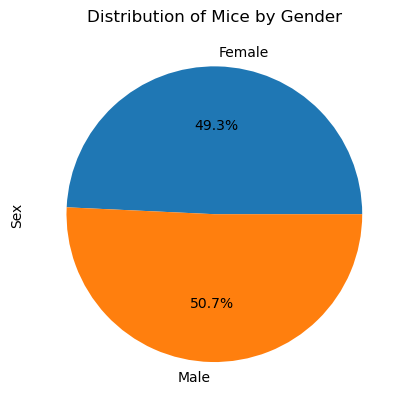

In [12]:
# Group data by gender
gender_group = cleaned_df.groupby('Sex')

# Count number of mice in each gender category
gender_count = gender_group['Sex'].count()

# Plot pie chart
gender_count.plot(kind='pie', autopct='%1.1f%%', 
                  title='Distribution of Mice by Gender')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_df = cleaned_df[cleaned_df["Drug Regimen"].isin(regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_tumor_df.groupby("Mouse ID")["Timepoint"].max()



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(last_timepoint, cleaned_df, on=["Mouse ID", "Timepoint"], how="left")


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volumes = cleaned_df.loc[cleaned_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    
    # add subset 
    tumor_vol_data.append(final_tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = final_tumor_volumes.loc[(final_tumor_volumes < lower_bound) | (final_tumor_volumes > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


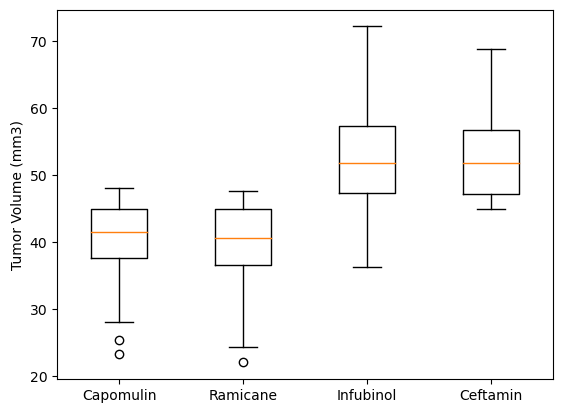

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create empty lists to store tumor volume for each treatment group
capomulin_vol = []
ramicane_vol = []
infubinol_vol = []
ceftamin_vol = []

# Loop through the data and append tumor volume to corresponding treatment group list
for index, row in cleaned_df.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        capomulin_vol.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ramicane":
        ramicane_vol.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Infubinol":
        infubinol_vol.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ceftamin":
        ceftamin_vol.append(row["Tumor Volume (mm3)"])

# Create a list of all treatment groups' tumor volume
data = [capomulin_vol, ramicane_vol, infubinol_vol, ceftamin_vol]

fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(treatments)
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

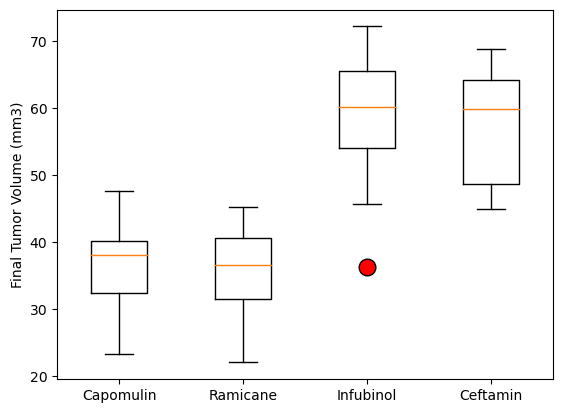

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

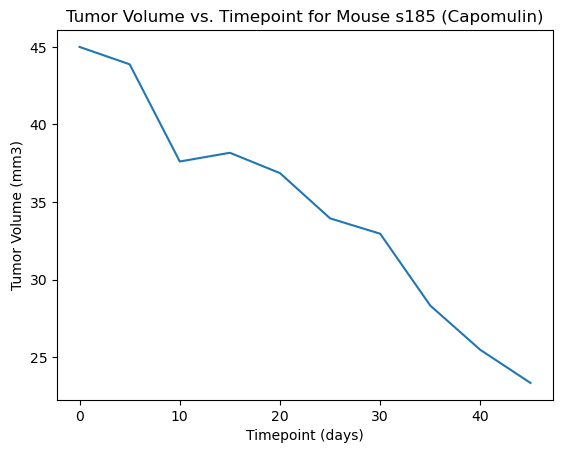

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse treated with Capomulin
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
mouse_id = capomulin_df["Mouse ID"].unique()[0]
mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id]

# Generate the line plot
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

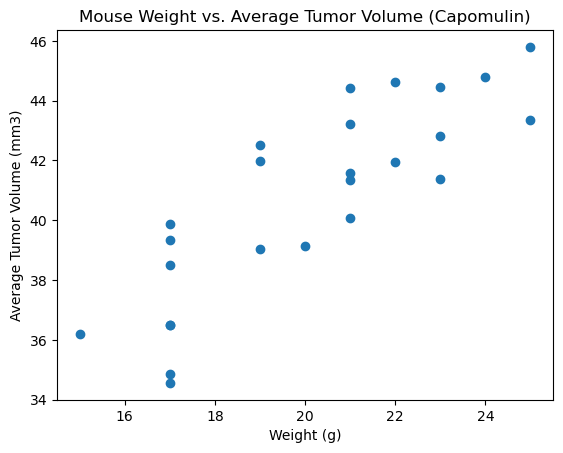

In [18]:
# Calculate the average tumor volume for each mouse on the Capomulin regimen
capomulin_data = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume with the mouse weight data
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_vol_df = pd.DataFrame({"Weight (g)": mouse_weight, "Average Tumor Volume (mm3)": avg_tumor_vol}).reset_index()

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.scatter(avg_tumor_vol_df["Weight (g)"], avg_tumor_vol_df["Average Tumor Volume (mm3)"])
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The linear regression model is: y = 0.95x + 21.55


/var/folders/31/y0ddgqds6_ddgm9yxdww950h0000gn/T/ipykernel_83358/1643034463.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_avg_vol = capomulin_data.groupby(["Mouse ID"]).mean()


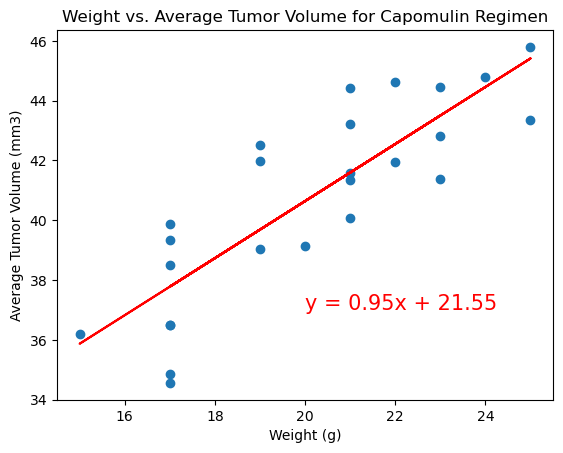

In [19]:
# Calculate correlation coefficient and linear regression model for Capomulin regimen
capomulin_data = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin_avg_vol = capomulin_data.groupby(["Mouse ID"]).mean()
capomulin_weight = capomulin_avg_vol["Weight (g)"]
capomulin_tumor_vol = capomulin_avg_vol["Tumor Volume (mm3)"]
correlation = st.pearsonr(capomulin_weight,capomulin_tumor_vol)
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_weight,capomulin_tumor_vol)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
print(f"The linear regression model is: {line_eq}")
# Plot scatter plot with linear regression model for Capomulin regimen
plt.scatter(capomulin_weight,capomulin_tumor_vol)
plt.plot(capomulin_weight,slope*capomulin_weight+intercept,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.show()
